# Difference in Differences

## Import packages

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pathlib
import matplotlib.pyplot as plt

## Set up directory structure

In [3]:
repo_f = pathlib.Path.cwd().parent

## Example 1

Simple DiD with PT assumption

In [5]:
df_ex_1 = pd.read_csv(repo_f.joinpath('input', 'did_example_1.csv'))

In [42]:
df_ex_1

,year,group,y1,y0,y,D,Pre/Post,post
0,1980,1,NaN,3.58,3.58,0,Pre.,0
1,1981,1,NaN,4.52,4.52,0,Pre.,0
2,1982,1,NaN,5.57,5.57,0,Pre.,0
3,1983,1,NaN,6.53,6.53,0,Pre.,0
4,1984,1,NaN,7.57,7.57,0,Pre.,0
5,1985,1,NaN,8.56,8.56,0,Pre.,0
6,1986,1,19.55,9.56,19.55,1,Post,1
7,1987,1,30.59,10.59,30.59,1,Post,1
8,1988,1,41.55,11.53,41.55,1,Post,1
9,1989,1,52.57,12.58,52.57,1,Post,1


In [8]:
# Create post treatment variable
df_ex_1['post'] = np.where(df_ex_1['Pre/Post'] == 'Post', 1, 0)

In [23]:
# Run DiD model
formula = 'y ~ C(post) + C(group, Treatment(reference=2) ) + C(post)*C(group, Treatment(reference=2))'
did_model = sm.OLS.from_formula(formula, data=df_ex_1)
# did_results = did_model.fit() # This is the default using non-robust standard errors
did_results = did_model.fit(cov_type='hc3')
did_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     15.39
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.27e-05
Time:                        12:42:42   Log-Likelihood:                -75.698
No. Observations:                  22   AIC:                             159.4
Df Residuals:                      18   BIC:                             163.8
Df Model:                           3                                         
Covariance Type:                  hc3                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              6.0683      0.834      7.280      0.000       4.435       7.702
C(post)[T.1]                                           5.5197      1.149      4.804      0.000       3.268       7.771
C(group, Treatment(reference=2))[T.1]                 -0.0133      1.181     -0.011      0.991      -2.329       2.302
C(post)[T.1]:C(group, Treatment(reference=2))[T.1]    29.9893      8.812      3.403      0.001      12.719      47.260
==============================================================================
Omnibus:                        8.870   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               14.388
Skew:                          -0.001   Prob(JB):                     0.000751
Kurtosis:                       6.962   Cond. No.                         6.61
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [31]:
# Calculate the average treatment effect on the treated

att = df_ex_1[df_ex_1['D']==1]['y1'].mean() - df_ex_1[df_ex_1['D']==1]['y0'].mean()
print(f'Average treatment effect on the treated: {att}')

# Calculate the average treatment effect on the treated from model
print(f'Average treatment effect on the treated from model: {did_results.params["C(post)[T.1]:C(group, Treatment(reference=2))[T.1]"]}')

Average treatment effect on the treated: 30.0
Average treatment effect on the treated from model: 29.989333333333363


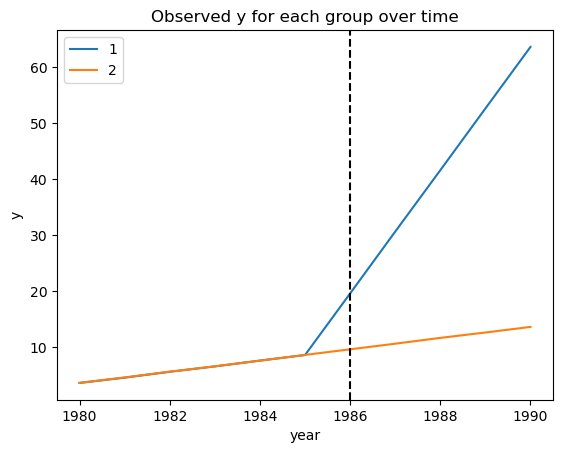

In [39]:
# Plot y for each group over time
fig, ax = plt.subplots()
for group in df_ex_1['group'].unique():
    df_ex_1[df_ex_1['group']==group].plot(x='year', y='y', ax=ax, label=group)

# Add line for treatment date
ax.axvline(x=1986, color='black', linestyle='--')
ax.set_title('Observed y for each group over time')
ax.set_xlabel('year')
ax.set_ylabel('y')
plt.show()


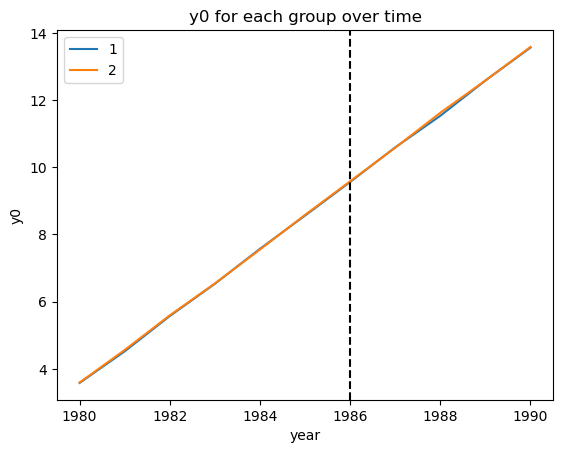

In [40]:
# Plot y for each group over time
fig, ax = plt.subplots()
for group in df_ex_1['group'].unique():
    df_ex_1[df_ex_1['group']==group].plot(x='year', y='y0', ax=ax, label=group)

# Add line for treatment date
ax.axvline(x=1986, color='black', linestyle='--')
ax.set_title('y0 for each group over time')
ax.set_xlabel('year')
ax.set_ylabel('y0')
plt.show()


## Example 2
Failure of PT

In [41]:
df_ex_2 = pd.read_csv(repo_f.joinpath('input', 'did_example_2.csv'))

In [44]:
df_ex_2

,year,group,y1,y0,y,D,Pre/Post,post
0,1980,1,NaN,3.58,3.58,0,Pre,0
1,1981,1,NaN,4.52,4.52,0,Pre,0
2,1982,1,NaN,5.57,5.57,0,Pre,0
3,1983,1,NaN,6.53,6.53,0,Pre,0
4,1984,1,NaN,7.57,7.57,0,Pre,0
5,1985,1,NaN,8.56,8.56,0,Pre,0
6,1986,1,19.55,15.00,19.55,1,Post,1
7,1987,1,30.59,25.00,30.59,1,Post,1
8,1988,1,41.55,35.00,41.55,1,Post,1
9,1989,1,52.57,48.00,52.57,1,Post,1


In [43]:
# Create post treatment variable
df_ex_2['post'] = np.where(df_ex_2['Pre/Post'] == 'Post', 1, 0)

In [45]:
# Run DiD model
formula = 'y ~ C(post) + C(group, Treatment(reference=2) ) + C(post)*C(group, Treatment(reference=2))'
did_model = sm.OLS.from_formula(formula, data=df_ex_2)
# did_results = did_model.fit() # This is the default using non-robust standard errors
did_results = did_model.fit(cov_type='hc3')
did_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     15.39
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.27e-05
Time:                        12:50:47   Log-Likelihood:                -75.698
No. Observations:                  22   AIC:                             159.4
Df Residuals:                      18   BIC:                             163.8
Df Model:                           3                                         
Covariance Type:                  hc3                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              6.0683      0.834      7.280      0.000       4.435       7.702
C(post)[T.1]                                           5.5197      1.149      4.804      0.000       3.268       7.771
C(group, Treatment(reference=2))[T.1]                 -0.0133      1.181     -0.011      0.991      -2.329       2.302
C(post)[T.1]:C(group, Treatment(reference=2))[T.1]    29.9893      8.812      3.403      0.001      12.719      47.260
==============================================================================
Omnibus:                        8.870   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               14.388
Skew:                          -0.001   Prob(JB):                     0.000751
Kurtosis:                       6.962   Cond. No.                         6.61
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [46]:
# Calculate the average treatment effect on the treated

att = df_ex_2[df_ex_2['D']==1]['y1'].mean() - df_ex_2[df_ex_2['D']==1]['y0'].mean()
print(f'Average treatment effect on the treated: {att}')

# Calculate the average treatment effect on the treated from model
print(f'Average treatment effect on the treated from model: {did_results.params["C(post)[T.1]:C(group, Treatment(reference=2))[T.1]"]}')

Average treatment effect on the treated: 4.963999999999999
Average treatment effect on the treated from model: 29.989333333333363


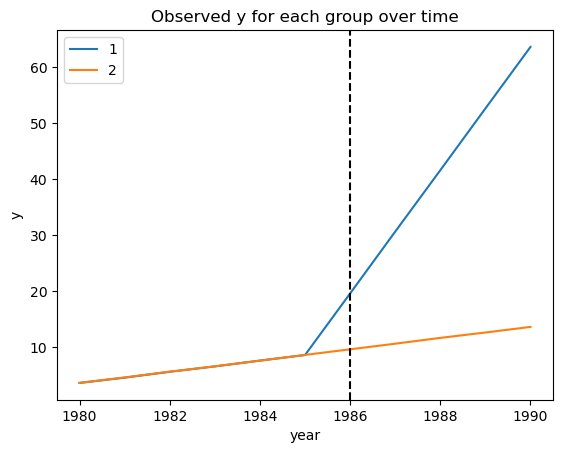

In [47]:
# Plot y for each group over time
fig, ax = plt.subplots()
for group in df_ex_2['group'].unique():
    df_ex_2[df_ex_2['group']==group].plot(x='year', y='y', ax=ax, label=group)

# Add line for treatment date
ax.axvline(x=1986, color='black', linestyle='--')
ax.set_title('Observed y for each group over time')
ax.set_xlabel('year')
ax.set_ylabel('y')
plt.show()


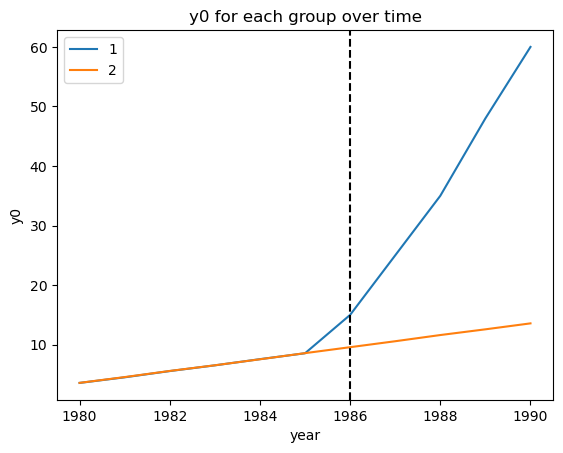

In [48]:
# Plot y for each group over time
fig, ax = plt.subplots()
for group in df_ex_2['group'].unique():
    df_ex_2[df_ex_2['group']==group].plot(x='year', y='y0', ax=ax, label=group)

# Add line for treatment date
ax.axvline(x=1986, color='black', linestyle='--')
ax.set_title('y0 for each group over time')
ax.set_xlabel('year')
ax.set_ylabel('y0')
plt.show()


# More realistic PT violation

In [63]:
group_2_trend = 0.5
group_1_trend = 0.8

# Initialize dataframe with 100,000 rows and 1 column
df = pd.DataFrame()

# Create a group variable that is 1 for 30 observations and 2 for 30 observations
df['group'] = np.concatenate([np.repeat(1, 30), np.repeat(2, 30)])

# Create a year variable that is 1-30 for group 1 and 1-30 for group 2
df['year'] = np.concatenate([np.arange(1, 31), np.arange(1, 31)])

# Create a treatment variable that is 1 for year>15 for group 1 and 0 for group 2
df['D'] = np.where((df['group']==1) & (df['year']>15), 1, 0)

# Create post variable that is 1 for year>15
df['post'] = np.where(df['year']>15, 1, 0)

# Create untreated outcome variable for group 1 that is a linear function of year
df['y0'] = group_2_trend*df['year']

# Add a linear increase starting in year 10 for group 1
df.loc[(df['year']>10) & (df['group']==1), 'y0'] = group_1_trend*df['year']

# Create treated outcome variable for group 1 that is y0 plus a linear increase starting in year 15
df['y1'] = df['y0']
df.loc[df['year']>15, 'y1'] = 0.8*df['y0'] + 5

# Create observed outcome variable that is y0 for group 2 and y0 for group 1 until year 15 and y1 for group 1 after year 15
df['y'] = df['y0']
df.loc[(df['group']==1) & (df['year']>15), 'y'] = df['y1']



    



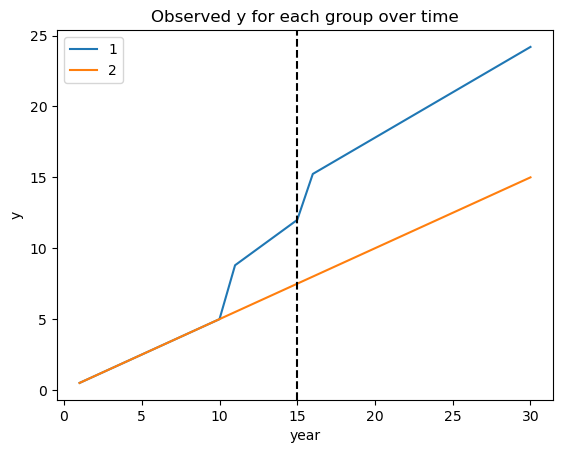

In [64]:
# Plot y for each group over time
fig, ax = plt.subplots()
for group in df['group'].unique():
    df[df['group']==group].plot(x='year', y='y', ax=ax, label=group)

# Add line for treatment date
ax.axvline(x=15, color='black', linestyle='--')
ax.set_title('Observed y for each group over time')
ax.set_xlabel('year')
ax.set_ylabel('y')
plt.show()

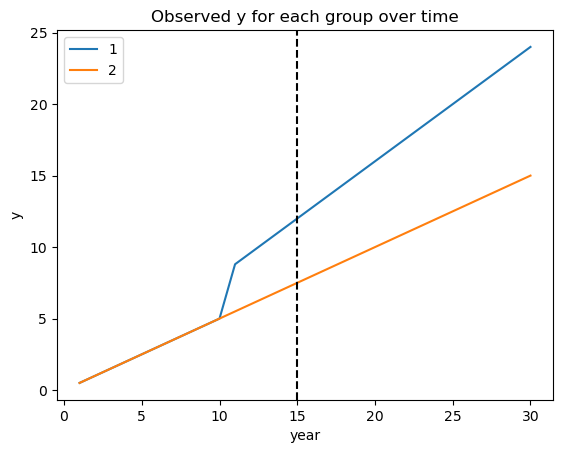

In [65]:
# Plot y for each group over time
fig, ax = plt.subplots()
for group in df['group'].unique():
    df[df['group']==group].plot(x='year', y='y0', ax=ax, label=group)

# Add line for treatment date
ax.axvline(x=15, color='black', linestyle='--')
ax.set_title('Observed y for each group over time')
ax.set_xlabel('year')
ax.set_ylabel('y')
plt.show()

In [67]:
# Run DiD model
formula = 'y ~ C(post) + C(group, Treatment(reference=2) ) + C(post)*C(group, Treatment(reference=2))'
did_model = sm.OLS.from_formula(formula, data=df)
# did_results = did_model.fit() # This is the default using non-robust standard errors
did_results = did_model.fit(cov_type='hc3')
did_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     96.02
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           4.66e-22
Time:                        13:10:59   Log-Likelihood:                -147.32
No. Observations:                  60   AIC:                             302.6
Df Residuals:                      56   BIC:                             311.0
Df Model:                           3                                         
Covariance Type:                  hc3                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              4.0000      0.598      6.693      0.000       2.829       5.171
C(post)[T.1]                                           7.5000      0.845      8.874      0.000       5.844       9.156
C(group, Treatment(reference=2))[T.1]                  1.3000      1.221      1.065      0.287      -1.093       3.693
C(post)[T.1]:C(group, Treatment(reference=2))[T.1]     6.9200      1.560      4.437      0.000       3.863       9.977
==============================================================================
Omnibus:                        3.789   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                2.555
Skew:                           0.326   Prob(JB):                        0.279
Kurtosis:                       2.227   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [68]:
# Calculate the average treatment effect on the treated

att = df[df['D']==1]['y1'].mean() - df[df['D']==1]['y0'].mean()
print(f'Average treatment effect on the treated: {att}')

# Calculate the average treatment effect on the treated from model
print(f'Average treatment effect on the treated from model: {did_results.params["C(post)[T.1]:C(group, Treatment(reference=2))[T.1]"]}')

Average treatment effect on the treated: 1.3200000000000038
Average treatment effect on the treated from model: 6.919999999999989
